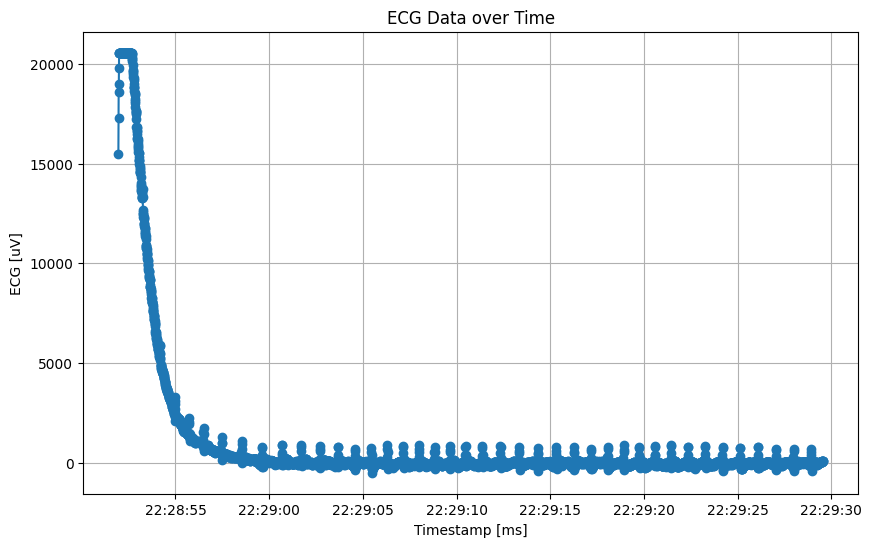

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from text file
data = pd.read_csv("./polar3/Polar_H10_83A00120_20240425_222850_ECG.txt", delimiter=";")

data = data.drop(columns=["sensor timestamp [ns]",	"timestamp [ms]"])

# Convert timestamp columns to datetime objects
data['Phone timestamp'] = pd.to_datetime(data['Phone timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
# data['sensor timestamp [ns]'] = pd.to_datetime(data['sensor timestamp [ns]'], unit='ns')
# data['timestamp [ms]'] = pd.to_timedelta(data['timestamp [ms]'], unit='ms')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Phone timestamp'], data['ecg [uV]'], marker='o', linestyle='-')
plt.title('ECG Data over Time')
plt.xlabel('Timestamp [ms]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()


In [62]:
print(data)

             Phone timestamp  ecg [uV]
0    2024-04-25 22:28:51.952     15475
1    2024-04-25 22:28:51.959     17302
2    2024-04-25 22:28:51.967     18593
3    2024-04-25 22:28:51.975     19005
4    2024-04-25 22:28:51.982     19795
...                      ...       ...
4886 2024-04-25 22:29:29.520        67
4887 2024-04-25 22:29:29.527        57
4888 2024-04-25 22:29:29.535        72
4889 2024-04-25 22:29:29.543        77
4890 2024-04-25 22:29:29.550        70

[4891 rows x 2 columns]


In [63]:
print(len(data))
seventy_five_percent_index = int(0.75 * len(data))
start_index = seventy_five_percent_index
end_index = start_index + 520 + 520 + 520 + 520
end_index = min(end_index, len(data))
data_pre = data.iloc[start_index:end_index]
# f = 130 Hz, lets take 4 windows 4 * 130 = 520 probes

4891


In [64]:
data_pre

,Phone timestamp,ecg [uV]
3668,2024-04-25 22:29:20.155,-155
3669,2024-04-25 22:29:20.162,-215
3670,2024-04-25 22:29:20.170,-198
3671,2024-04-25 22:29:20.178,-148
3672,2024-04-25 22:29:20.185,-143
...,...,...
4886,2024-04-25 22:29:29.520,67
4887,2024-04-25 22:29:29.527,57
4888,2024-04-25 22:29:29.535,72
4889,2024-04-25 22:29:29.543,77


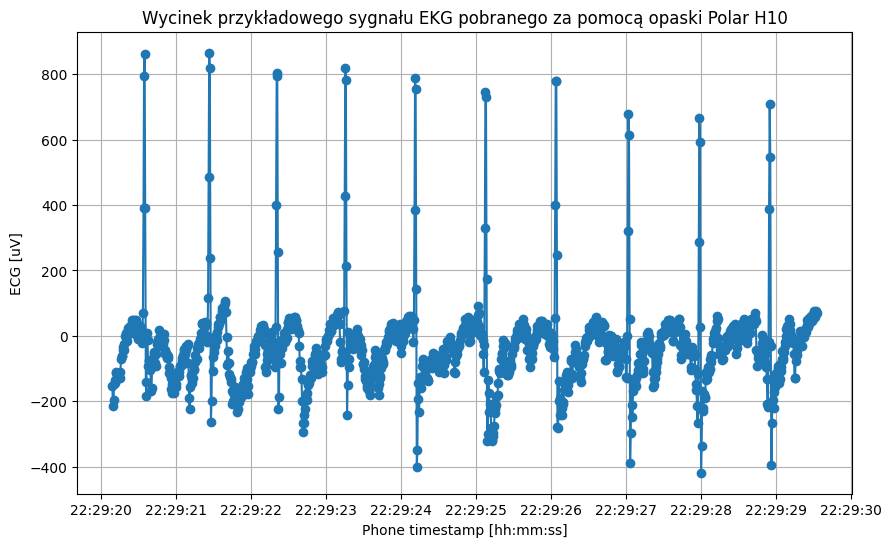

In [65]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_pre['Phone timestamp'], data_pre['ecg [uV]'], marker='o', linestyle='-')
plt.title('Wycinek przykładowego sygnału EKG pobranego za pomocą opaski Polar H10')
plt.xlabel('Phone timestamp [hh:mm:ss]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()

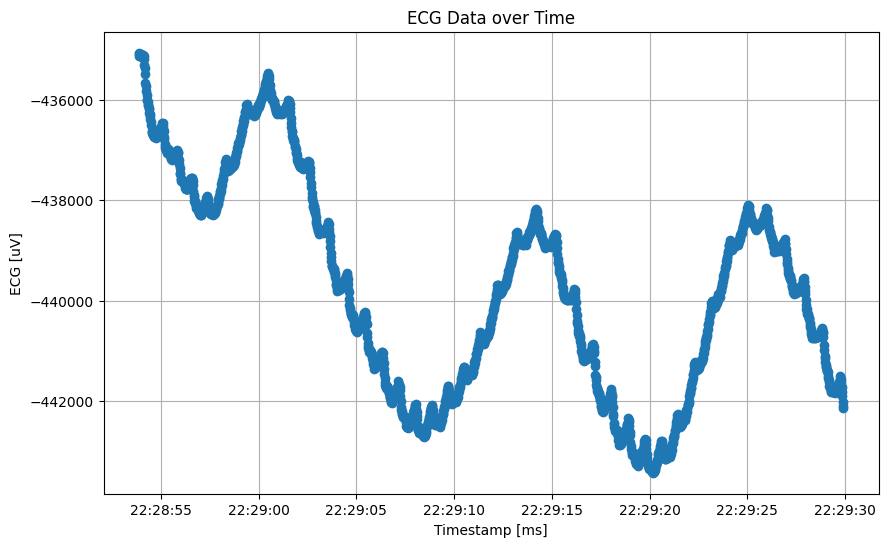

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from text file
data_PPG = pd.read_csv("./polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt", delimiter=";")
data_PPG['mean_channel'] = data_PPG[['channel 0', 'channel 1', 'channel 2', 'ambient']].mean(axis=1)
data_PPG = data_PPG.drop(columns=["sensor timestamp [ns]",	"channel 0",	"channel 1",	"channel 2",	"ambient"])

# # # Convert timestamp columns to datetime objects

data_PPG['Phone timestamp'] = pd.to_datetime(data_PPG['Phone timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')



# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_PPG['Phone timestamp'], data_PPG['mean_channel'], marker='o', linestyle='-')
plt.title('ECG Data over Time')
plt.xlabel('Timestamp [ms]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()


In [67]:
print(data_PPG)

             Phone timestamp  mean_channel
0    2024-04-25 22:28:53.859    -435066.75
1    2024-04-25 22:28:53.877    -435090.25
2    2024-04-25 22:28:53.895    -435123.75
3    2024-04-25 22:28:53.931    -435120.75
4    2024-04-25 22:28:53.913    -435132.00
...                      ...           ...
1982 2024-04-25 22:29:29.846    -441810.50
1983 2024-04-25 22:29:29.864    -441901.25
1984 2024-04-25 22:29:29.882    -442013.50
1985 2024-04-25 22:29:29.901    -442089.25
1986 2024-04-25 22:29:29.919    -442142.50

[1987 rows x 2 columns]


In [68]:
data_pre.iloc[0]["Phone timestamp"]

Timestamp('2024-04-25 22:29:20.155000')

In [69]:
pd.Timestamp(data_pre.iloc[0]["Phone timestamp"])

Timestamp('2024-04-25 22:29:20.155000')

In [70]:
pre_PPG = data_PPG[data_PPG['Phone timestamp'] >=  data_pre.iloc[0]["Phone timestamp"]]
pre_PPG = pre_PPG.head(220)

In [71]:
pre_PPG

,Phone timestamp,mean_channel
1449,2024-04-25 22:29:20.169,-443403.50
1450,2024-04-25 22:29:20.187,-443425.25
1451,2024-04-25 22:29:20.205,-443401.25
1452,2024-04-25 22:29:20.223,-443392.50
1453,2024-04-25 22:29:20.241,-443389.75
...,...,...
1664,2024-04-25 22:29:24.072,-438890.50
1665,2024-04-25 22:29:24.090,-438895.00
1666,2024-04-25 22:29:24.109,-438825.75
1667,2024-04-25 22:29:24.127,-438795.00


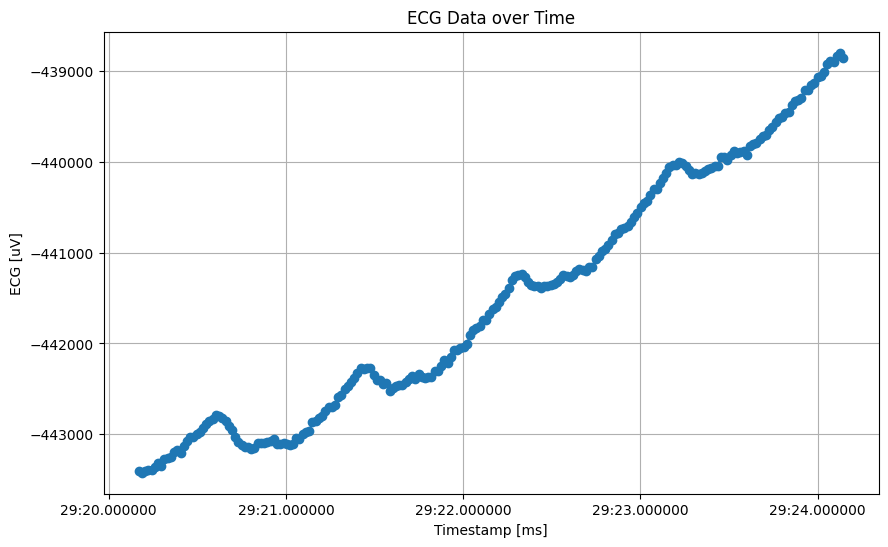

In [72]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(pre_PPG['Phone timestamp'], pre_PPG['mean_channel'], marker='o', linestyle='-')
plt.title('ECG Data over Time')
plt.xlabel('Timestamp [ms]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


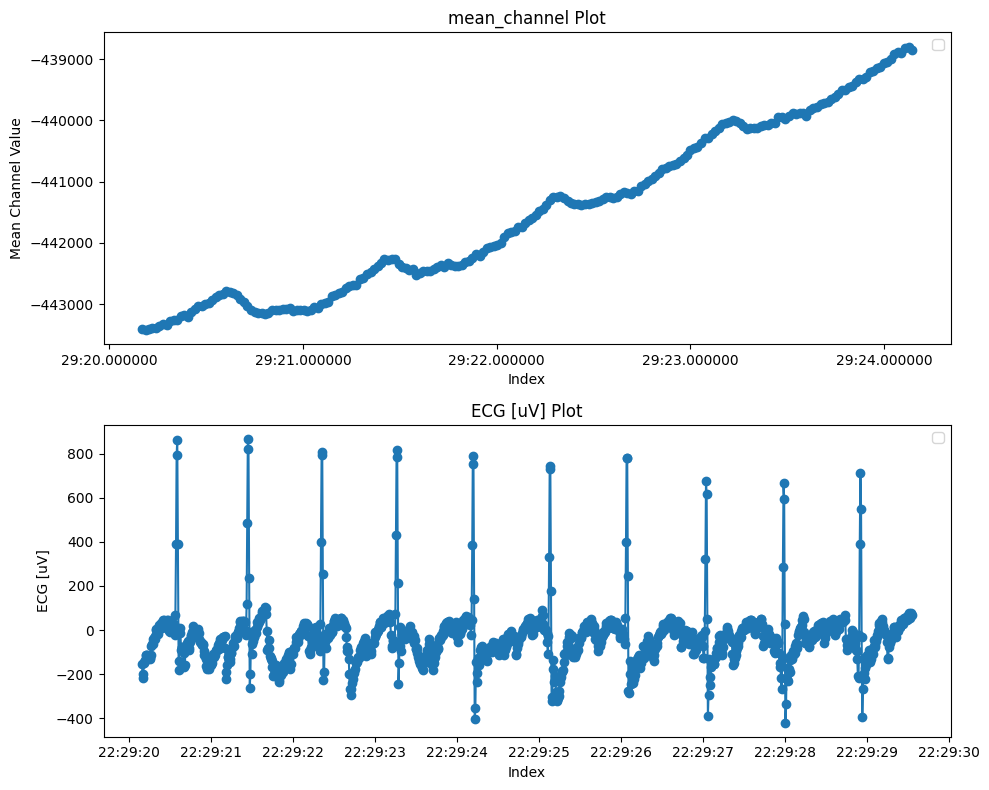

In [73]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot mean_channel_values on the first subplot (ax1)
ax1.plot(pre_PPG['Phone timestamp'], pre_PPG['mean_channel'], marker='o', linestyle='-')
ax1.set_title('mean_channel Plot')
ax1.set_xlabel('Index')
ax1.set_ylabel('Mean Channel Value')
ax1.legend()

# Plot ecg_values on the second subplot (ax2)
ax2.plot(data_pre['Phone timestamp'], data_pre['ecg [uV]'], marker='o', linestyle='-')
ax2.set_title('ECG [uV] Plot')
ax2.set_xlabel('Index')
ax2.set_ylabel('ECG [uV]')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [74]:
data_pre = data_pre.drop(columns=["Phone timestamp"])
transformed_df_ECG = data_pre.transpose()
print(transformed_df_ECG)

          3668  3669  3670  3671  3672  3673  3674  3675  3676  3677  ...  \
ecg [uV]  -155  -215  -198  -148  -143  -135  -115  -112  -115  -117  ...   

          4881  4882  4883  4884  4885  4886  4887  4888  4889  4890  
ecg [uV]    52    45    52    67    77    67    57    72    77    70  

[1 rows x 1223 columns]


In [75]:
new_column_names = [f"ECG_{i+1}" for i in range(len(transformed_df_ECG.columns))]

# Assign the new column names to the DataFrame
transformed_df_ECG.columns = new_column_names


In [76]:
transformed_df_ECG

,ECG_1,ECG_2,ECG_3,ECG_4,ECG_5,ECG_6,ECG_7,ECG_8,ECG_9,ECG_10,...,ECG_1214,ECG_1215,ECG_1216,ECG_1217,ECG_1218,ECG_1219,ECG_1220,ECG_1221,ECG_1222,ECG_1223
ecg [uV],-155,-215,-198,-148,-143,-135,-115,-112,-115,-117,...,52,45,52,67,77,67,57,72,77,70


In [77]:
pre_PPG = pre_PPG.drop(columns=["Phone timestamp"])
transformed_df_PPG = pre_PPG.transpose()
print(transformed_df_PPG)

new_column_names = [f"PPG_{i+1}" for i in range(len(transformed_df_PPG.columns))]

# Assign the new column names to the DataFrame
transformed_df_PPG.columns = new_column_names


                  1449       1450       1451      1452       1453       1454  \
mean_channel -443403.5 -443425.25 -443401.25 -443392.5 -443389.75 -443366.25   

                   1455       1456       1457      1458  ...      1659  \
mean_channel -443318.75 -443347.25 -443279.25 -443264.5  ... -439125.5   

                   1660       1661       1662       1663      1664      1665  \
mean_channel -439062.25 -439052.75 -439005.25 -438920.25 -438890.5 -438895.0   

                   1666      1667       1668  
mean_channel -438825.75 -438795.0 -438849.25  

[1 rows x 220 columns]


In [78]:
transformed_df_PPG

,PPG_1,PPG_2,PPG_3,PPG_4,PPG_5,PPG_6,PPG_7,PPG_8,PPG_9,PPG_10,...,PPG_211,PPG_212,PPG_213,PPG_214,PPG_215,PPG_216,PPG_217,PPG_218,PPG_219,PPG_220
mean_channel,-443403.5,-443425.25,-443401.25,-443392.5,-443389.75,-443366.25,-443318.75,-443347.25,-443279.25,-443264.5,...,-439125.5,-439062.25,-439052.75,-439005.25,-438920.25,-438890.5,-438895.0,-438825.75,-438795.0,-438849.25


In [79]:
transformed_df_PPG = transformed_df_PPG.drop(columns=transformed_df_PPG.index)

KeyError: "['mean_channel'] not found in axis"

In [ ]:
print(transformed_df_PPG)

                 PPG_1      PPG_2      PPG_3     PPG_4      PPG_5      PPG_6  \
mean_channel -443403.5 -443425.25 -443401.25 -443392.5 -443389.75 -443366.25   

                  PPG_7      PPG_8      PPG_9    PPG_10  ...   PPG_211  \
mean_channel -443318.75 -443347.25 -443279.25 -443264.5  ... -439125.5   

                PPG_212    PPG_213    PPG_214    PPG_215   PPG_216   PPG_217  \
mean_channel -439062.25 -439052.75 -439005.25 -438920.25 -438890.5 -438895.0   

                PPG_218   PPG_219    PPG_220  
mean_channel -438825.75 -438795.0 -438849.25  

[1 rows x 220 columns]


In [ ]:
# merged_df = pd.concat([transformed_df_PPG, transformed_df_ECG], axis=1)
# merged_df = transformed_df_PPG.join(transformed_df_ECG)
merged_df = pd.DataFrame({**transformed_df_ECG.iloc[0].to_dict(), **transformed_df_PPG.iloc[0].to_dict()}, index=[0])
# merged_df = transformed_df_PPG.join(transformed_df_ECG)
print(merged_df)
# merged_df.to_csv("merged_df.csv")

   ECG_1  ECG_2  ECG_3  ECG_4  ECG_5  ECG_6  ECG_7  ECG_8  ECG_9  ECG_10  ...  \
0   -155   -215   -198   -148   -143   -135   -115   -112   -115    -117  ...   

    PPG_211    PPG_212    PPG_213    PPG_214    PPG_215   PPG_216   PPG_217  \
0 -439125.5 -439062.25 -439052.75 -439005.25 -438920.25 -438890.5 -438895.0   

     PPG_218   PPG_219    PPG_220  
0 -438825.75 -438795.0 -438849.25  

[1 rows x 740 columns]
